In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurment = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#Create Inspector to get the columns for the Table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
last_date = session.query(measurment.date).order_by(measurment.date.desc()).first()
last_date


('2017-08-23',)

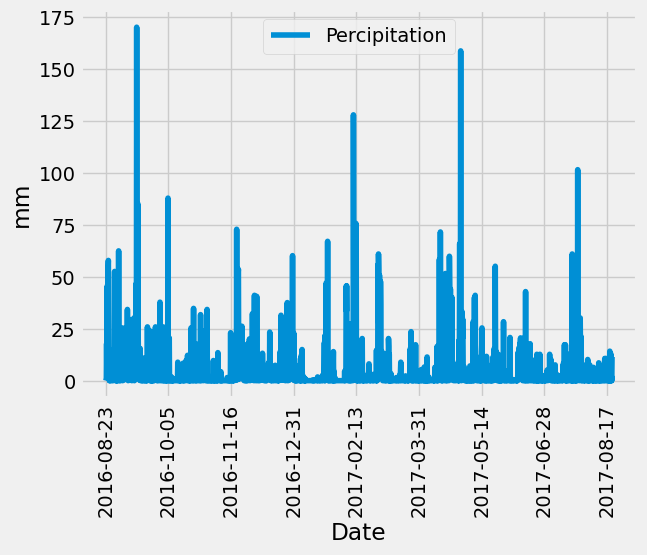

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurment.date,measurment.prcp).filter(measurment.date >= query_date , measurment.prcp != 'None').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
results_df = pd.DataFrame(results,columns=['Date','Percipitation']).sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
results_df.set_index('Date')['Percipitation'].plot(legend=True ,rot=90)
plt.ylabel("Date")
plt.ylabel("mm")
plt.show()


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Percipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
#create Inspector to get the columns from the table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurment.station,func.count(measurment.station)]
active_station = session.query(*sel).\
    group_by(measurment.station).\
    order_by(func.count(measurment.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
(most_active,totalcount) = active_station[0]
most_active
session.query(func.min(measurment.tobs),func.max(measurment.tobs),func.avg(measurment.tobs)).filter(measurment.station == most_active).all()

[(12.2, 29.4, 22.03582251082252)]

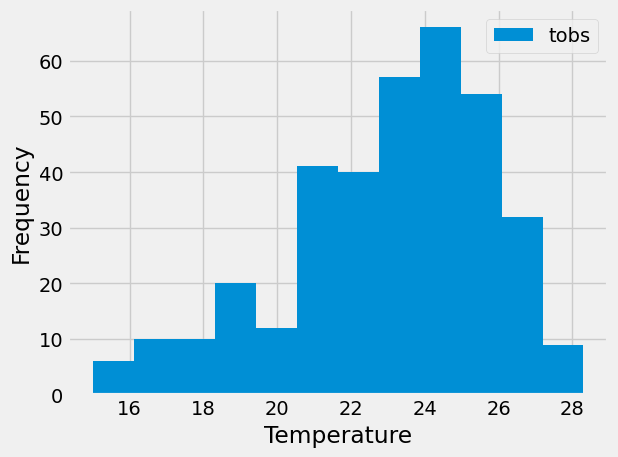

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurment.date).filter(measurment.station == most_active).order_by(measurment.date.desc()).first()
# Calculate the date one year from the last date in data set.
query_date1 = dt.date(2017, 8, 18) - dt.timedelta(days=365)

results1 = session.query(measurment.tobs).filter(measurment.station == most_active , measurment.date >= query_date1).all()

# Save the query results as a Pandas DataFrame.
results_df1 = pd.DataFrame(results1)

# Use Pandas Plotting with Matplotlib to plot the data
results_df1.plot.hist(bins=12)

plt.xlabel("Temperature")
plt.tight_layout()
plt.show()


# Close Session

In [21]:
# Close Session
session.close()